In [1]:
# Importing necessary libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
                 # Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

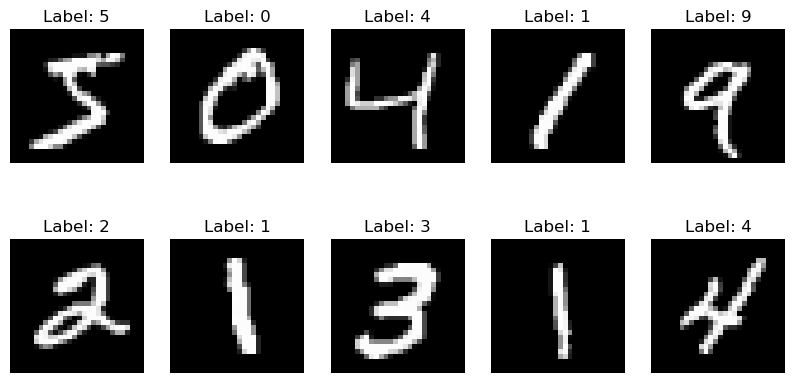

In [3]:
# Visualizing some images from the dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [4]:
# Preprocessing the data
X_train = X_train / 255.0  # Normalize pixel values to [0, 1]
X_test = X_test / 255.0
y_train = to_categorical(y_train, 10)  # One-hot encode the labels
y_test = to_categorical(y_test, 10)

In [5]:
# Building the neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),          # Flatten 28x28 images into 1D arrays
    Dense(128, activation='relu'),         # Hidden layer with 128 neurons
    Dense(10, activation='softmax')        # Output layer with 10 neurons (one per class)
])

C:\Users\ki\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#backward propagation 

In [7]:
# Training the model
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8833 - loss: 0.4159
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9610 - loss: 0.1283
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9762 - loss: 0.0784
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9837 - loss: 0.0550
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9870 - loss: 0.0411


In [8]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)  #
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 97.69%


In [9]:
# Testing the model with some examples
predictions = model.predict(X_test[:5])
for i, prediction in enumerate(predictions):
    predicted_class = prediction.argmax()
    actual_class = y_test[i].argmax()
    print(f"Sample {i+1}: Predicted = {predicted_class}, Actual = {actual_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Sample 1: Predicted = 7, Actual = 7
Sample 2: Predicted = 2, Actual = 2
Sample 3: Predicted = 1, Actual = 1
Sample 4: Predicted = 0, Actual = 0
Sample 5: Predicted = 4, Actual = 4


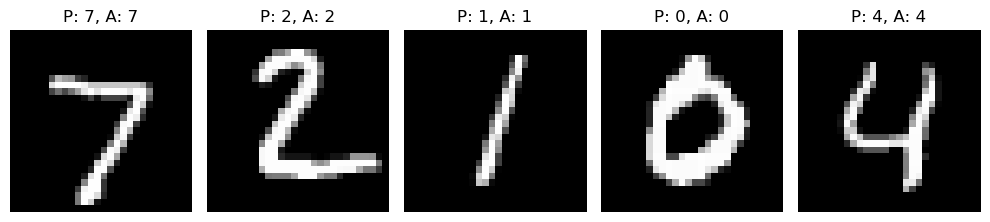

In [11]:
# Visualizing predictions
import numpy as np
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    predicted_class = np.argmax(predictions[i])
    actual_class = np.argmax(y_test[i])
    plt.title(f"P: {predicted_class}, A: {actual_class}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [12]:
model.save("mnist_ann.h5")
